In [16]:
import pandas as pd
import numpy as np

pd.set_option("display.max_rows", 15)
pd.set_option('display.max_columns', 40)

from tqdm import tqdm

import matplotlib.pylab as plt
%matplotlib inline

import os
os.chdir('..')

In [17]:
transactions = pd.read_csv('transactions.csv')
transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,7391977,0 10:23:26,4814,1030,-2245.92,NaN
1,7391977,1 10:19:29,6011,7010,56147.89,NaN
2,7391977,1 10:20:56,4829,2330,-56147.89,NaN
3,7391977,1 10:39:54,5499,1010,-1392.47,NaN
4,7391977,2 15:33:42,5499,1010,-920.83,NaN


In [ ]:
transactions.groupby('day').sum().neg_amount.apply(abs)[-30:].plot()

In [7]:
tr_types = pd.read_csv('tr_types.csv', sep=';')
print(tr_types.shape)
tr_types.head()

(155, 2)


,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...


In [9]:
tr_mcc = pd.read_csv('tr_mcc_codes.csv', sep=';')
tr_mcc.head()

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


In [10]:
transactions.customer_id.value_counts()

15945261      88781
391248880     34229
47329099      26856
53492776      25944
29821053      21111
43808487      19187
36591297      19004
              ...  
35203747          1
1930152200        1
126098145         1
2163972500        1
77573918          1
1421843120        1
69840146          1
Name: customer_id, Length: 15000, dtype: int64

In [11]:
transactions.customer_id.unique().shape

(15000,)

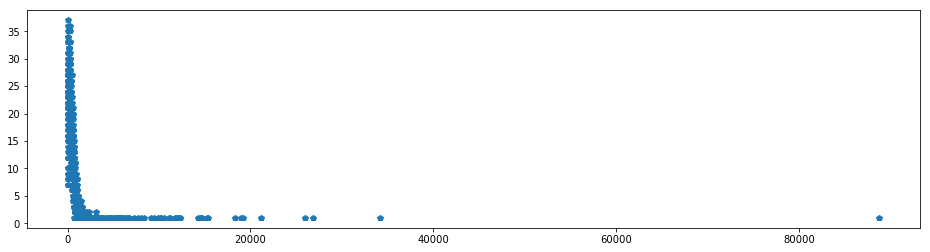

In [12]:
n_transactions_by_customer = transactions.customer_id.value_counts().reset_index().groupby('customer_id').count()
n_transactions_by_customer.columns = ['n_transactions']
plt.figure(figsize=(16,4))
plt.plot(n_transactions_by_customer.index, n_transactions_by_customer.n_transactions, 'p')

In [13]:
day_distr = transactions.tr_datetime.apply(lambda x: x.split()[0]).value_counts()
day_distr.index = day_distr.index.astype(np.int16)
day_distr.sort_index(inplace=True)
day_distr

0      12797
1      10143
2       8845
3      11321
4      12142
5      11798
6      11619
       ...  
450    14170
451    17661
452    17749
453    18262
454    17910
455    19192
456    16756
Name: tr_datetime, Length: 457, dtype: int64

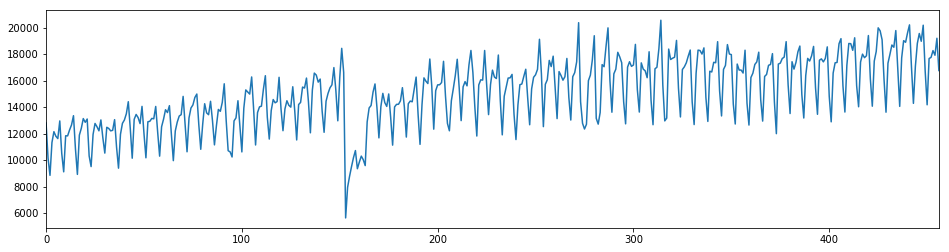

In [14]:
day_distr.plot(figsize=(16,4))

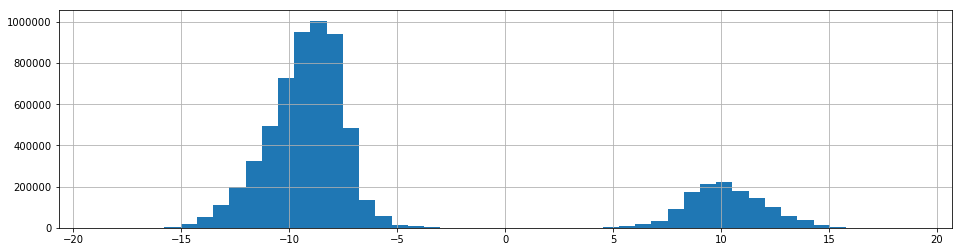

In [15]:
log_amount = transactions.amount.apply(lambda x: np.sign(x) * np.log(1 + np.abs(x)))
log_amount.hist(bins=50, figsize=(16,4))

In [ ]:
transactions.mcc_code.unique().shape